<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. Naložite podatke iz datoteke v dataframe.
#Iz njega odstranite vse kategorične podatke.
#Številske podatke standardizirajte.
#Za nadaljnje analize boste potrebovali samo številske podatke.

import pandas as pd
df= pd.read_csv("university_rank_no_nan1.csv")

In [7]:
df.dtypes

Unnamed: 0                    object
Country                       object
Number_students              float64
Numb_students_per_Staff      float64
Score_Result                 float64
Rank                           int64
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
dtype: object

In [8]:
stevilski=df.select_dtypes(exclude=["object"])
dfSt = df[stevilski.columns]

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [20.0, 20.0, 43.75, 43.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [31.875, 31.875, 84.375, 84.375],
  [5.0, 5.0, 58.125, 58.125]],
 'dcoord': [[0.0, 81.92877152746773, 81.92877152746773, 0.0],
  [0.0, 80.81667061318477, 80.81667061318477, 0.0],
  [0.0, 90.2495671402362, 90.2495671402362, 80.81667061318477],
  [0.0, 129.65698740908644, 129.65698740908644, 90.2495671402362],
  [81.92877152746773,
   158.14779847029172,
   158.14779847029172,
   129.65698740908644],
  [0.0, 130.6753611052979, 130.6753611052979, 0.0],
  [0.0, 134.9292036588077, 134.9292036588077, 130.6753611052979],
  [0.0, 146.53106295387678, 146.53106295387678, 134.9292036588077],
  [0.0, 224.06862241354688, 224.06862241354688, 146.53106295387678],
  [158.14779847029172,
   384.26642165169727,
   384.26642165169727

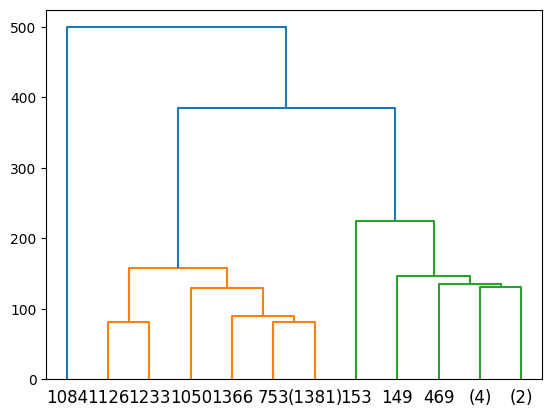

In [9]:
# 2. Da dobite približen vpogled na koliko gruč bi bilo najbolj
# optimalno deliti instance uporabite hierarhično gručenje in
# izrišite dendrogram z maksimalno delitvijo na 5 nivojev.

from scipy.cluster.hierarchy import linkage, dendrogram
razdalje=linkage(dfSt, "single")
dendrogram(razdalje, orientation="top", p=5, truncate_mode='level')

In [10]:
# 3. Izvedite gručenje z uporabo K-means algoritma.
# Algoritem naj razdeli instance v dve gruči.
# Izpišite koliko je instanc v posamezni gruči.

from sklearn.cluster import KMeans
km= KMeans(n_clusters=2, random_state=0)
km.fit(dfSt)
gruce= km.labels_
st_instanc = {i: sum(gruce == i) for i in range(2)}
print("Število instanc v posamezni gruči:", st_instanc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Število instanc v posamezni gruči: {0: 834, 1: 562}


In [11]:
# 4. Naredite analizo koliko je optimalno število gruč pri uporabi
# K-means algoritma (preizkusite delitev na do 10 gruč) in
# izrišite graf po metodi komolca.
# Zapišite na koliko gruč je po vašem mnenju
# najbolj smiselno razdeliti instance.

v_in={}
for i in range(1,10):
  km2=KMeans(n_clusters=i, random_state=0, n_init="auto")
  km2.fit(dfSt)
  v_in[i]=km2.inertia_

Text(0.5, 0, 'število gruč')

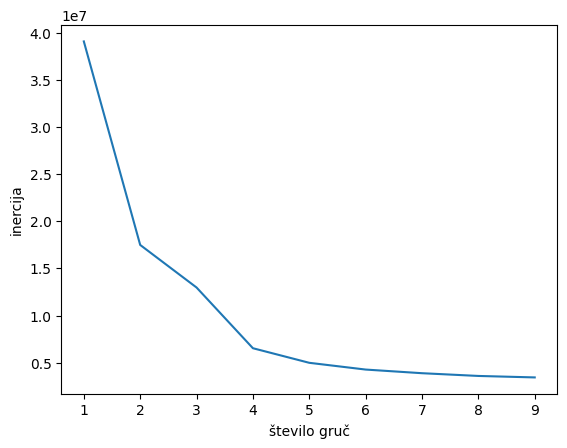

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x= list(v_in.keys()), y=list(v_in.values()))
plt.ylabel("inercija")
plt.xlabel("število gruč")

In [ ]:
#Najbolj je smiselno razdeliti na 2 ali 3 gruče, čeprav je še v 4ik en prelom
#zato bom rekla na 2-4

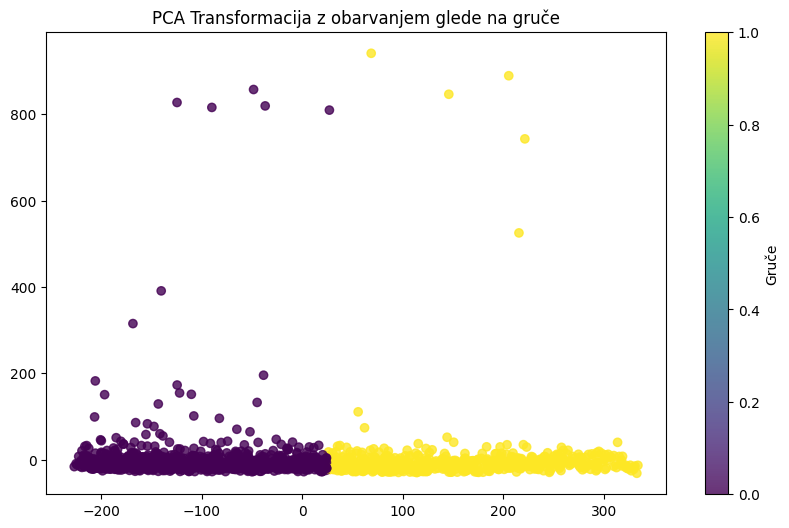

In [13]:
# 5. S pomočjo PCA transformacije naredite dva nova stolpca.
# Vrednosti iz teh dveh stolpcev prikažite v grafu raztrosa.
# Instance naj bodo obarvane glede na to, v katero gručo jih je razvrstil
# K-means algoritem. Uporabite rezultate k-means algoritma,
# ki po vašem mnenju razdeli instance v najbolj optimalno število gruč
#  (iz 4. točke).


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Uporabi PCA na celotnih podatkih
pca = PCA(n_components=2)
transformirani_podatki = pca.fit_transform(dfSt)

# Pridobimo oznake gruč za vsako instanco
gruce = km.labels_

# Ustvarimo DataFrame za prikaz rezultatov
df_pca = pd.DataFrame(data=transformirani_podatki, columns=['col1', 'col2'])
df_pca['Gruče'] = gruce

# Prikažemo graf raztrosa
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=df_pca['Gruče'], cmap='viridis', alpha=0.8)
plt.title('PCA Transformacija z obarvanjem glede na gruče')
plt.colorbar(label='Gruče')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


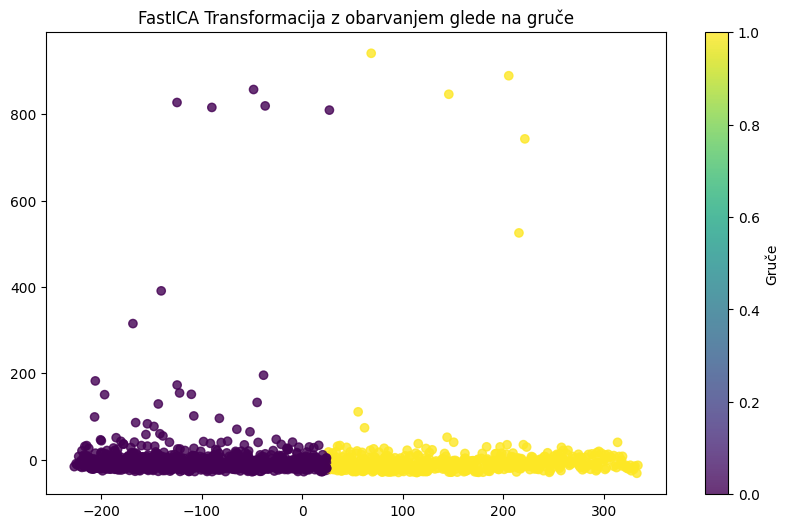

In [14]:
# 6. Naredite novo transformacijo številskih (še ne transformiranih podatkov)
#  s pomočjo algoritma FastICA, s katero ustvarite dva nova stolpca .
#  Na enak način kot v prejšnji točki izrišite graf raztrosa,
# le da tu uporabite vrednosti teh dveh novih stolpcev.


from sklearn.decomposition import FastICA#vse stolpce bomo prikazali znotraj enega grafa=> celoten dataset spremenimo v 2 stolpca
tr=FastICA(n_components=2).fit_transform(dfSt) #kot izhod 2 stolpca
#! slabost ne obdrži strukture dataframe-a
dfTr=pd.DataFrame(tr, columns=("col1", "col2"))
dfTr.head()

#graf
# Prikažemo graf raztrosa
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['col1'], df_pca['col2'], c=df_pca['Gruče'], cmap='viridis', alpha=0.8)
plt.title('FastICA Transformacija z obarvanjem glede na gruče')
plt.colorbar(label='Gruče')
plt.show()